# The Cartpole Problem
The goal of the cartpole problem is to keep an inverted pendulum attached to a cart on a frictionless track upright by exerting forces on the cart. I will explore both physics based solutions and solutions found from reinforcement learning. I begin with a physical solution which picks a force that minimizes the pole angulary velocity.

In [1]:
# import gym
# env = gym.make('CartPole-v0')
# env.reset()
# for _ in range(500):
#     env.render()
#     env.step(env.action_space.sample()) # take a random action
# env.close()

In [2]:
from itertools import permutations
import numpy as np
import gym
from gym import wrappers
from time import time

def theta_dot_minimizer(observation, env):
    """
    A physics based solution to the cartpole environment from the gym module.
    Parameters
    ----------
    observation (ndarray): contains the cart position, cart velocity, pole angle, and pole angular velocity
    env (object): the cartpole environment being used
    Returns
    -------
    force (int): either 0 or 1 to represent a leftward or rightward force on the cart
    """
    
    # Get initial conditions from environment
    x, x_dot, theta, theta_dot = env.state
    
    # Create an array with all possible forces
    force = np.array([1, -1])
    
    # Compute sine and cosine of pole angle
    costheta = np.cos(theta)
    sintheta = np.sin(theta)
    
    # Calculate the pole angular acceleration
    temp = (force + env.polemass_length * theta_dot ** 2 * sintheta) / env.total_mass
    thetaacc = (env.gravity * sintheta - costheta * temp) / (env.length * (4.0 / 3.0 - env.masspole * costheta ** 2 / env.total_mass))

    # Calculate pole angular velocity at next time step using Euler's method
    theta_dot = theta_dot + env.tau * thetaacc
    
    # Rerturn the force that minimizes absolute value of theta_dot
    if np.abs(theta_dot[0]) < np.abs(theta_dot[1]):
        return 1
    return 0

# env_to_wrap = gym.make('CartPole-v0')
# env = wrappers.Monitor(env_to_wrap, './videos/' + str(time()) + '/')
# observation = env.reset()
# done = False

# while not done:
#     env.render()
#     observation, reward, done, info = env.step(env.action_space.sample())
# env.close()

# t = 0
# while True:
#     t += 1
#     env.render()
#     action = theta_dot_minimizer(observation, env)
#     observation, reward, done, info = env.step(action)
#     if done:
#         print("Episode finished after {} timesteps".format(t))
#         break
# env.close()

env = gym.make('CartPole-v0')
total_games = 100
rewards = np.zeros(total_games)
for i in range(total_games):
    total_reward = 0
    observation = env.reset()
    done = False
    while not done:       
        action = theta_dot_minimizer(observation, env)
        observation, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            done = False
            rewards[i] = total_reward
            break

print(f'The average reward of the physical solution is {np.average(rewards)}.')
print(f'The standard deviation of the reward of the physical solution is {np.std(rewards)}.')

# env_to_wrap.close()

The average reward of the physical solution is 194.44.
The standard deviation of the reward of the physical solution is 11.970229738814538.


Now I solve the envrionment with the REINFORCE algo.

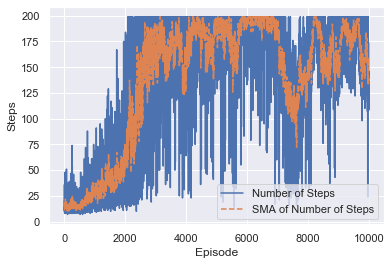

The average reward of the physical solution is 139.1.
The standard deviation of the reward of the physical solution is 21.473472006175435.
The total number of episiodes is 10000.
The time elapsed is 10.32 minutes.


In [4]:
import reinforce
reinforce.main(GAMMA=.5)

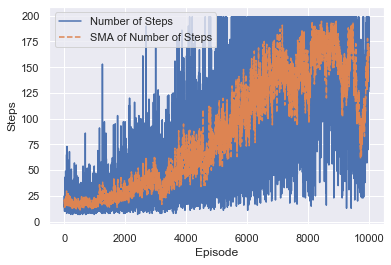

The average reward of the physical solution is 149.74.
The standard deviation of the reward of the physical solution is 34.85501972456765.
The total number of episiodes is 10000.
The time elapsed is 6.89 minutes.


In [1]:
import reinforce
reinforce.main(GAMMA=.25)

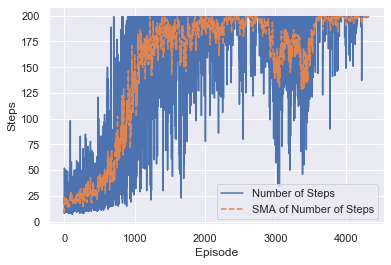

The average reward of the physical solution is 197.72.
The standard deviation of the reward of the physical solution is 15.178985473344394.
The total number of episiodes is 4329.
The time elapsed is 5.01 minutes.


In [5]:
reinforce.main(.75)

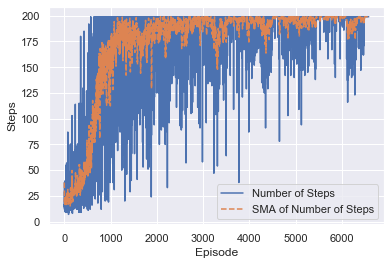

The average reward of the physical solution is 200.0.
The standard deviation of the reward of the physical solution is 0.0.
The total number of episiodes is 6579.
The time elapsed is 8.86 minutes.


In [6]:
reinforce.main(1)

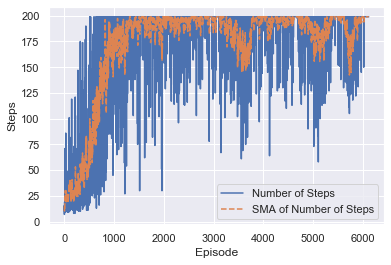

The average reward of the physical solution is 199.3.
The standard deviation of the reward of the physical solution is 4.972926703662542.
The total number of episiodes is 6121.
The time elapsed is 7.85 minutes.


In [7]:
reinforce.main(.9)